In [7]:
#!!conda install -c conda-forge mlxtend --yes
!conda install seaborn --yes

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\miniconda3\envs\ds

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py312haa95532_0         556 KB
    ------------------------------------------------------------
                                           Total:         556 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py312haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [8]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df = pd.read_csv('datasets/eHRs-gen2-aggregated-1y.csv', encoding='latin1')

In [57]:
df.columns

Index(['p_id', 'age', 'v_o_id', 'sex', 'F40-F41', 'I20-I25', 'E10-E14',
       'I10-I15', 'E78', 'F17', 'J45', 'F20', 'M15-M19', 'I50', 'N18', 'E66',
       'K76.0', 'I34-I38', 'C55', 'H35', 'E03', 'G80-G83', 'F09', 'M10', 'M13',
       'G20', 'L40', 'I71', 'I48', 'G25', 'F10', 'K90.4', 'F01-F03', 'N20',
       'F50', 'I60-I64', 'K21', 'J44', 'F48', 'G45', 'C61', 'F70-F79', 'I69',
       'K73', 'I70', 'F30-F39', 'C34', 'I65', 'C25', 'M81', 'H40-H42', 'C50',
       'K50-K51', 'M79.7', 'C18-C20', 'C67', 'F90-F98', 'L20', 'M05-M06',
       'C88', 'K74', 'C81', 'M30-M31', 'C64-C65', 'F60-F69', 'C22', 'G40-G41',
       'Q20-Q28', 'I74', 'I67-I69', 'C82-C85', 'C56', 'C14', 'H35.3', 'B20',
       'C16', 'F19', 'F89', 'C43', 'F84', 'C62', 'C91-C95', 'C53', 'C46',
       'C73', 'C40-C41', 'Z89', 'pred1y_I20-I25', 'pred1y_H35', 'pred1y_N18',
       'pred1y_Z89', 'age_group'],
      dtype='object')

In [49]:
df.sex.value_counts()

sex
M    1040257
F     962749
U      97984
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_5456\534797540.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(s1)["sex"].value_counts().unstack()


<Axes: title={'center': 'Age distri'}, xlabel='age'>

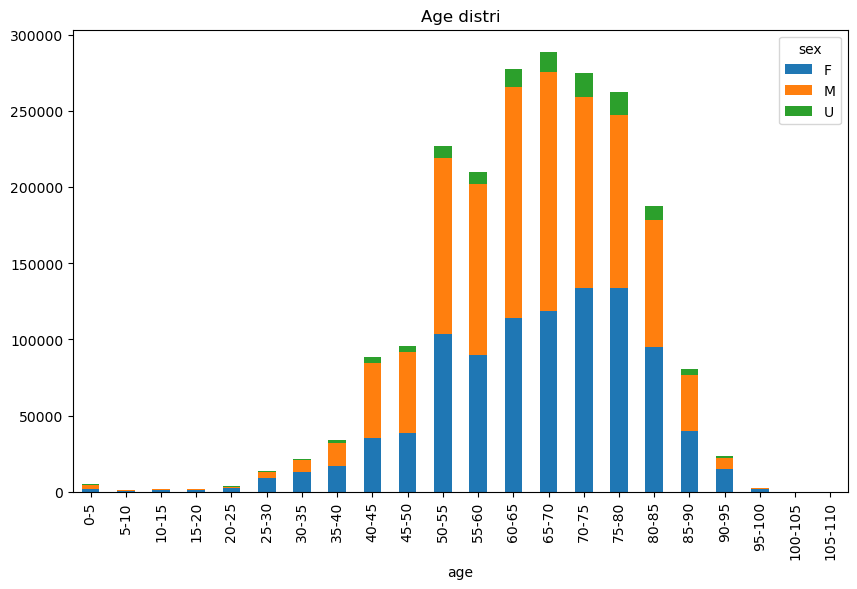

In [63]:
#df.head(4)
#df.age.plot(kind='hist', bins=20)
bins = range(0, df['age'].max() + 5, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]
s1 = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# counts = df.groupby(s1)["sex"].size()
counts = df.groupby(s1)["sex"].value_counts().unstack()
counts
counts.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6))
#s_num = df.sex.replace({'M':0, 'F':1 , 'U':2})
#s2= pd.cut(s_num, bins=bins, labels=labels, right=False)
#s1
#df2 = pd.DataFrame({'age': s1, 'sex': s2});df2
#g= df2.groupby(["s2","s1"]).size()
#g
#df['age_group']= df['age_group'] /df['age_group'].sum()*100
#gr2 = df.groupby(['age_group']).size().unstack()
#df['age_group']
#gr2.plot(kind='bar', title='Age distri',)
#gr2



In [96]:
dfc = counts.reset_index()
counts


sex,F,M,U
age,,,
0-5,1605,2769,433
5-10,263,487,70
10-15,931,808,125
15-20,893,784,82
20-25,2064,1182,191
25-30,8633,4536,692
30-35,13093,7353,1091
35-40,17101,14905,1586
40-45,35021,49754,3742


<Axes: title={'center': 'Age distri'}, xlabel='age'>

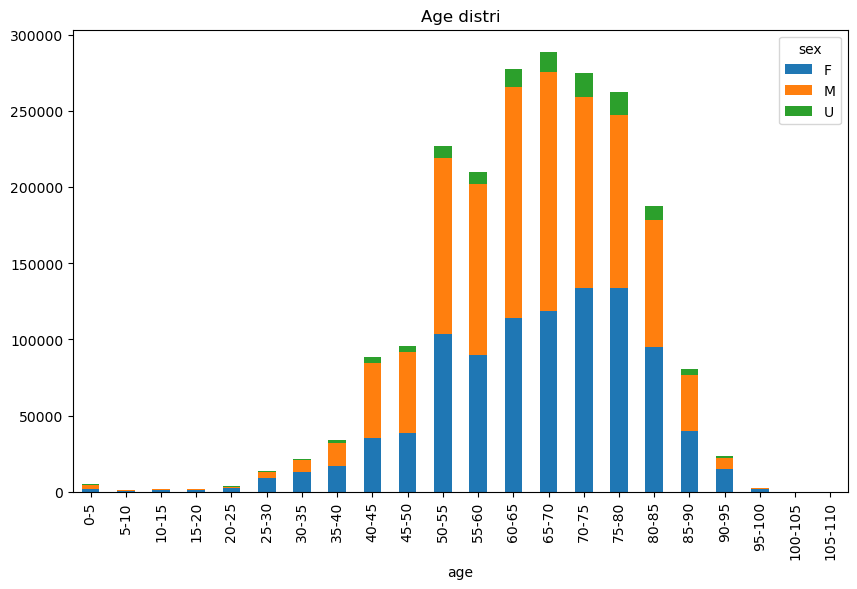

In [95]:
counts.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6))

In [97]:
relative_counts1 = counts.div(df.groupby(s1)["sex"].count()/100, axis=0)
relative_counts1


C:\Users\HP\AppData\Local\Temp\ipykernel_5456\591876316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_counts1 = counts.div(df.groupby(s1)["sex"].count()/100, axis=0)


sex,F,M,U
age,,,
0-5,33.388808,57.603495,9.007697
5-10,32.073171,59.390244,8.536585
10-15,49.946352,43.347639,6.706009
15-20,50.767482,44.570779,4.661740
20-25,60.052371,34.390457,5.557172
25-30,62.282664,32.724912,4.992425
30-35,60.793054,34.141245,5.065701
35-40,50.907954,44.370683,4.721362
40-45,39.564152,56.208412,4.227437


<Axes: title={'center': ' Relative Age distri'}, xlabel='age'>

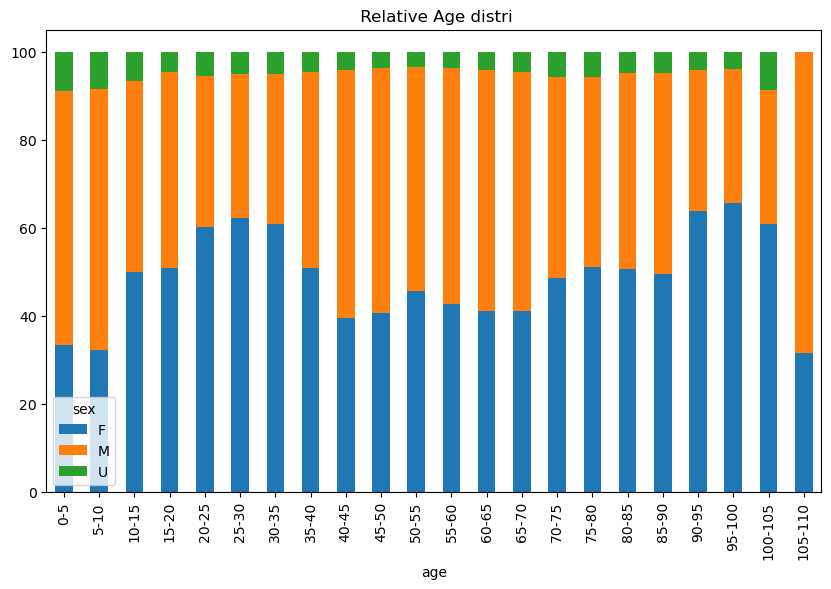

In [98]:
relative_counts1.plot(kind='bar', stacked=True, title=' Relative Age distri', figsize=(10, 6))

In [99]:
#relative_counts2 = counts.div(df.groupby(s1)["sex"].count(), axis=1)
relative_counts2 = counts.div(counts.sum(axis=0), axis=1).T
relative_counts2

age,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,...,60-65,65-70,70-75,75-80,80-85,85-90,90-95,95-100,100-105,105-110
sex,,,,,,,,,,,,,,,,,,,,,
F,0.001667,0.000273,0.000967,0.000928,0.002144,0.008967,0.013600,0.017763,0.036376,0.040233,...,0.118233,0.123268,0.138860,0.139244,0.098729,0.041290,0.015487,0.001453,0.000015,0.000006
M,0.002662,0.000468,0.000777,0.000754,0.001136,0.004360,0.007068,0.014328,0.047829,0.051027,...,0.146147,0.150912,0.120538,0.109094,0.080337,0.035308,0.007197,0.000622,0.000007,0.000012
U,0.004419,0.000714,0.001276,0.000837,0.001949,0.007062,0.011134,0.016186,0.038190,0.036241,...,0.120612,0.137686,0.164088,0.152729,0.094689,0.039272,0.009930,0.000857,0.000020,0.000000


<Axes: title={'center': 'Age distri'}, xlabel='sex'>

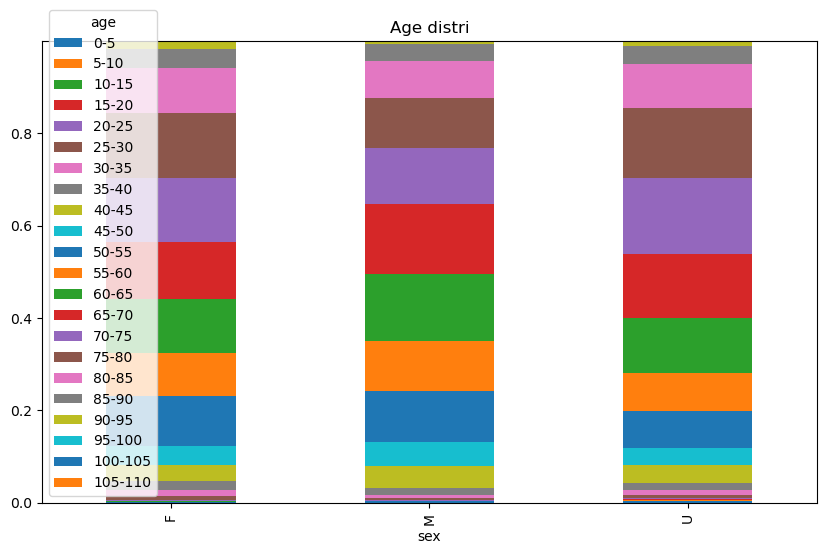

In [100]:
relative_counts2.plot(kind='bar', stacked=True, title='Age distri', figsize=(10, 6))

In [72]:
#df.columns[4:]
#df3 = df.iloc[:,4:];df3.head(3)
df3 = df3.fillna(0)


In [77]:
A = apriori(df3, min_support=0.5,use_colnames=True);A

c:\Users\HP\miniconda3\envs\ds\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.601853,(E10-E14)


In [79]:
apriori(df3, min_support=0.3,use_colnames=True)

c:\Users\HP\miniconda3\envs\ds\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.601853,(E10-E14)
1,0.488669,(I10-I15)
2,0.367579,(E78)
3,0.312242,(M15-M19)
4,0.304986,"(E10-E14, I10-I15)"


In [80]:
apriori(df3, min_support=0.1,use_colnames=True)

c:\Users\HP\miniconda3\envs\ds\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.198693,(F40-F41)
1,0.105908,(I20-I25)
2,0.601853,(E10-E14)
3,0.488669,(I10-I15)
4,0.367579,(E78)
5,0.106823,(F17)
6,0.312242,(M15-M19)
7,0.128501,(I50)
8,0.122972,(E66)
9,0.102269,(J44)
